In [46]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 13)

[0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
[0.94444444 0.94444444 0.94444444 0.97142857 1.        ]
[0.83333333 0.88888889 0.91666667 1.         1.        ]
[0.91666667 0.94444444 1.         0.97142857 1.        ]


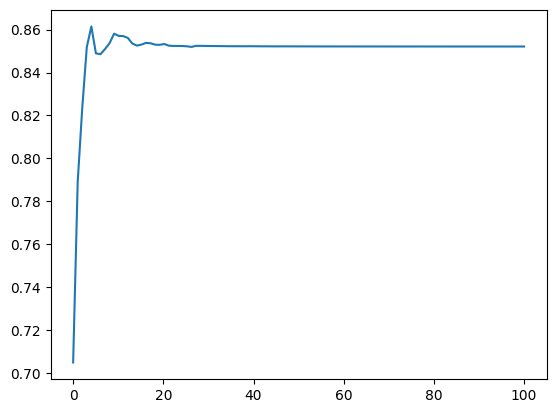

In [48]:
tree = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
bagg = BaggingClassifier(n_estimators=100, random_state=1)
ada = AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=1)
grad = GradientBoostingClassifier(max_depth=1, subsample=0.5, learning_rate=1.0, n_estimators=100, random_state=1)

print(sklearn.model_selection.cross_val_score(tree, X, y))
print(sklearn.model_selection.cross_val_score(bagg, X, y))
print(sklearn.model_selection.cross_val_score(ada, X, y))
print(sklearn.model_selection.cross_val_score(grad, X, y))

grad.fit(X, y)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
cumsum = np.cumsum(grad.oob_improvement_)
x_val = np.linspace(0,len(cumsum), 100)
plt.plot(x_val, cumsum)